<a href="https://colab.research.google.com/github/ratesh21/DSP/blob/main/Ztransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Values of x: [1.        0.5       0.25      0.125     0.0625    0.03125   0.015625
 0.0078125]

nth sample: [0 1 2 3 4 5 6 7]


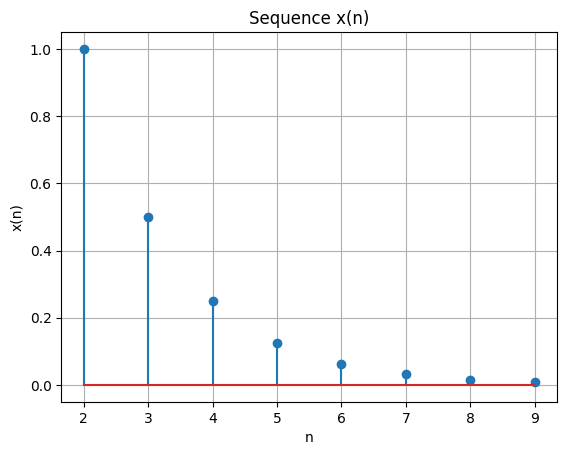

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Defining the sequence
n = np.arange(0, 8, 1)
x = 0.5 ** n
print("Values of x:", x)
print()
print("nth sample:", n)

#Generating the sequence x(n)
z = plt.stem(n +2, x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Sequence x(n)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1109: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


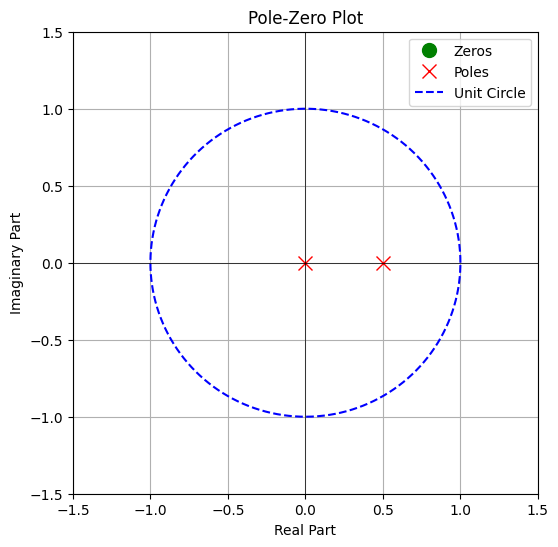

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2zpk

# Coefficients of numerator and denominator
b = [0, 0, 1]  #No zero
a = [1, -0.5, 0]  #z^2 - 0.5z + 0 = 0

# Getting poles, zeros, and gain of the transfer function
zeros, poles, _ = tf2zpk(b, a)

# Plotting the pole-zero plot
plt.figure(figsize=(6, 6))
plt.plot(np.real(zeros), np.imag(zeros), 'go', markersize=10, label='Zeros')  # green circles for zeros
plt.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Poles')  # red x for poles

# Plot unit circle for reference
unit_circle = np.exp(1j * np.linspace(0, 2 * np.pi, 1000))
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'b--', label='Unit Circle')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot')
plt.legend()
plt.grid()
plt.show()

[0.        0.        1.        0.5       0.25      0.125     0.0625
 0.03125   0.015625  0.0078125]

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


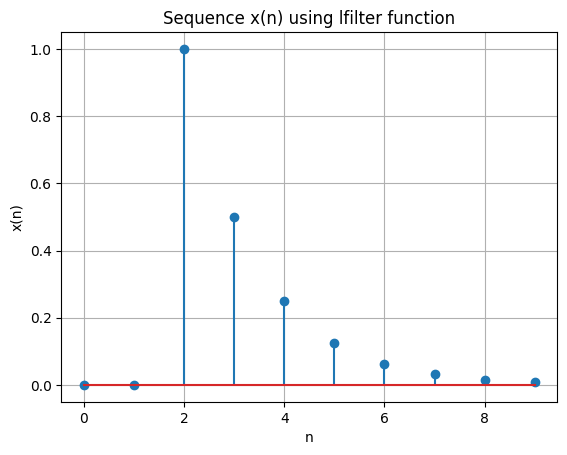

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

N = 8
impulse = np.zeros(N+2)
impulse[0] = 1
b = [0, 0, 1]
a = [1, -0.5, 0]

verify_signal = signal.lfilter(b, a, impulse)
print(verify_signal)
print()
print(impulse)

plt.stem(verify_signal)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Sequence x(n) using lfilter function')
plt.grid(True)
plt.show()


[ 1.    -0.9   -0.81   0.729]
Residues: [0.25-0.j 0.5 +0.j 0.25+0.j]
Poles: [ 0.9+0.j  0.9+0.j -0.9+0.j]
Recovered signal 1: [1.        0.9       1.62      1.458     1.9683    1.77147   2.125764
 1.9131876]
Calculated x(n): [1.        0.9       1.62      1.458     1.9683    1.77147   2.125764
 1.9131876]


<Figure size 1000x500 with 0 Axes>

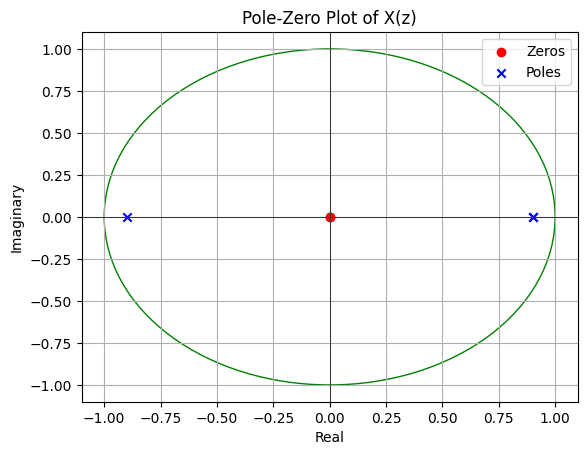

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Define the roots for the denominator (using the roots of the factors)
def transfer_function_coefficients():
    # Roots and their multiplicities
    z1 = 0.9
    z2 = -0.9
    mul1 = 2  # multiplicity of root z1
    mul2 = 1  # multiplicity of root z2

    # Define the polynomial (denominator) using roots
    poly1 = np.poly([z1] * mul1)  # (1 - 0.9z^-1)^2
    poly2 = np.poly([z2] * mul2)  # (1 + 0.9z^-1)

    # Multiply polynomials to get the overall denominator coefficients
    a_coeff = np.polymul(poly1, poly2)

    # The numerator is just 1
    b_coeff = [1,0,0]

    return b_coeff, a_coeff

# Get the transfer function coefficients
b_1, a_1 = transfer_function_coefficients()
print(a_1)
# Calculate residues, poles, and direct term
residues, poles, direct_term = signal.residuez(b_1, a_1)

print("Residues:", residues)
print("Poles:", poles)

# Generate an impulse signal
N = 8  # Number of samples
impulse = np.zeros(N)
impulse[0] = 1  # Impulse at n=0

# Recover the signal using lfilter
recovered_signal1 = signal.lfilter(b_1, a_1, impulse)
print("Recovered signal 1:", (recovered_signal1))

# Use the residues to calculate x(n) analytically
A, B, C = 0.75,0.5,0.25
alpha = 0.9

# Generate the sequence x(n) using the residues
n = np.arange(0,N)
x_n = np.real(A * alpha**n + B * n * alpha**n + C * (-alpha)**n)  # Take real part

print("Calculated x(n):", x_n)

plt.figure(figsize=(10, 5))

# Plot the pole-zero plot
plt.figure()
plt.title('Pole-Zero Plot of X(z)')
plt.xlabel('Real')
plt.ylabel('Imaginary')


# Plot poles and zeros
zeros = np.roots(b_1)
poles = np.roots(a_1)
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='r', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='b', label='Poles')
circle = plt.Circle((0, 0), 1, color='g', fill=False)
plt.gca().add_patch(circle)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.legend()
plt.show()